<a href="https://colab.research.google.com/github/AshwinCarvalho999/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
#importing all important library
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#checking for null or missing values in dataset 
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

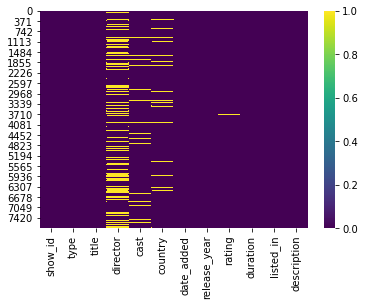

In [ ]:
#creating heatmap for visualizing null values
sns.heatmap(df.isnull(),cmap = 'viridis')

In [ ]:
df['rating'].value_counts().unique()

array([2863, 1931,  806,  665,  386,  280,  271,  247,  194,   84,   39,
          6,    5,    3])

Dropping director & cast columns as they are not playing important part in
analysis 

In [ ]:
#droping director and cast columns
df.drop(['director','cast'],axis=1,inplace=True)

In [ ]:
#dataset after dropping columns
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**.We replaced all the Null values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.**

In [ ]:
df['country'].replace(np.nan, 'United States',inplace=True)

**We already have released year for each movie and hence even if we dont have released date,it wont affect our analysis much. Hence we can Drop released date column**

In [ ]:
df.drop(['date_added'],axis=1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
df['listed_in'].value_counts()

Documentaries                                             334
Stand-Up Comedy                                           321
Dramas, International Movies                              320
Comedies, Dramas, International Movies                    243
Dramas, Independent Movies, International Movies          215
                                                         ... 
Dramas, Music & Musicals, Sports Movies                     1
Kids' TV, Reality TV, Science & Nature TV                   1
Reality TV, Science & Nature TV, TV Action & Adventure      1
Docuseries, Science & Nature TV, TV Action & Adventure      1
Action & Adventure, Sci-Fi & Fantasy, Sports Movies         1
Name: listed_in, Length: 492, dtype: int64

**As we can see we only have 10 missing values in our rating column, we can either drop them or replace them. We have TV-MA which is the most common rating and hence we can replace all these null values with TV-MA.**

In [ ]:
df['rating'].replace(np.nan,'TV-MA',inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


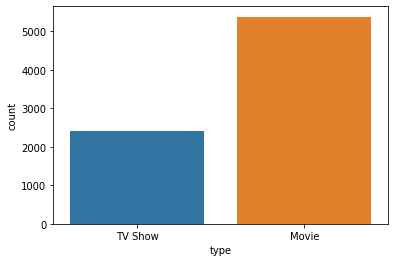

In [ ]:
#finding out which has highest counting for tv shows or movies
sns.countplot(x='type',data=df)

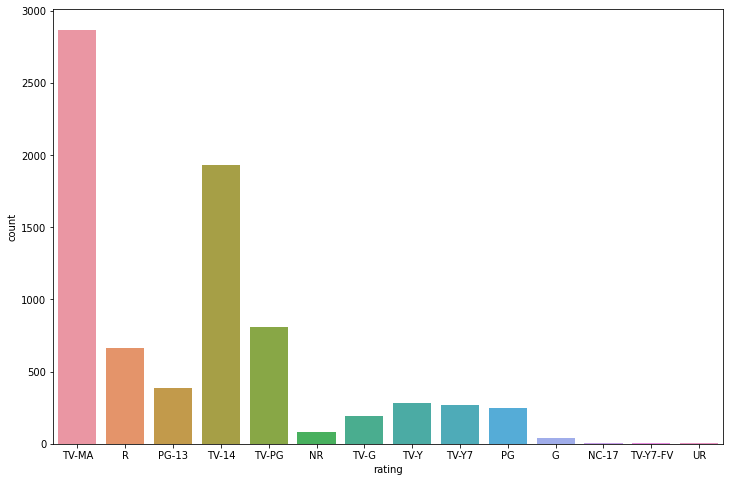

In [ ]:
#finding the highest counts for rating 
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df)

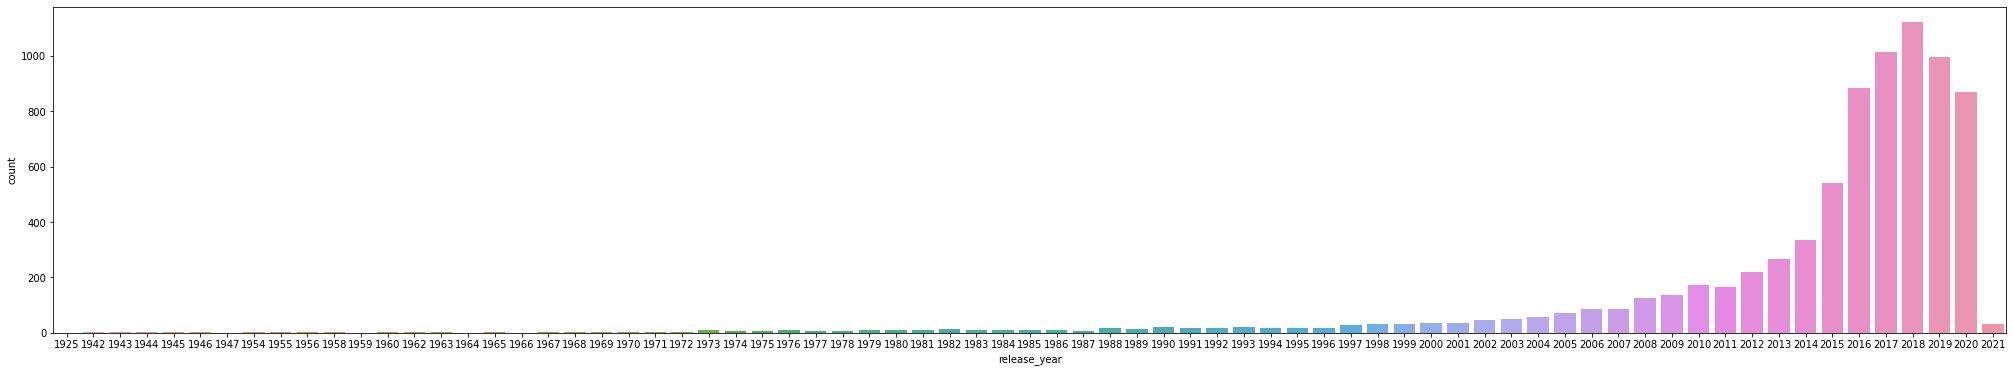

In [ ]:
#finding the highest count for release year for all tv shows and movies
plt.figure(figsize = (35,6))

sns.countplot(x='release_year',data = df)


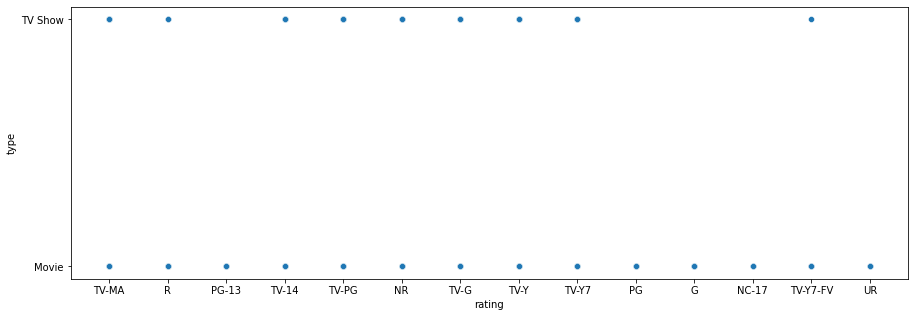

In [ ]:
#finding the ratings type for all the tv shows and movies
plt.figure(figsize=(15,5))
sns.scatterplot(x='rating',y='type',data=df)

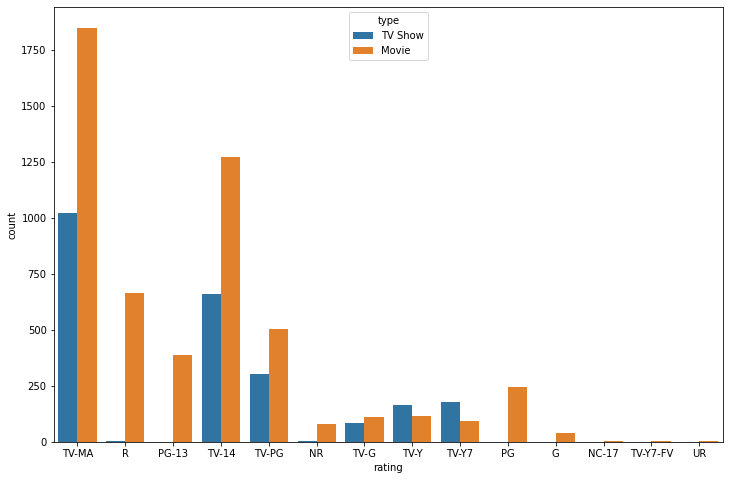

In [ ]:
#creating a count plot for rating for tv shows and movies
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df,hue='type')

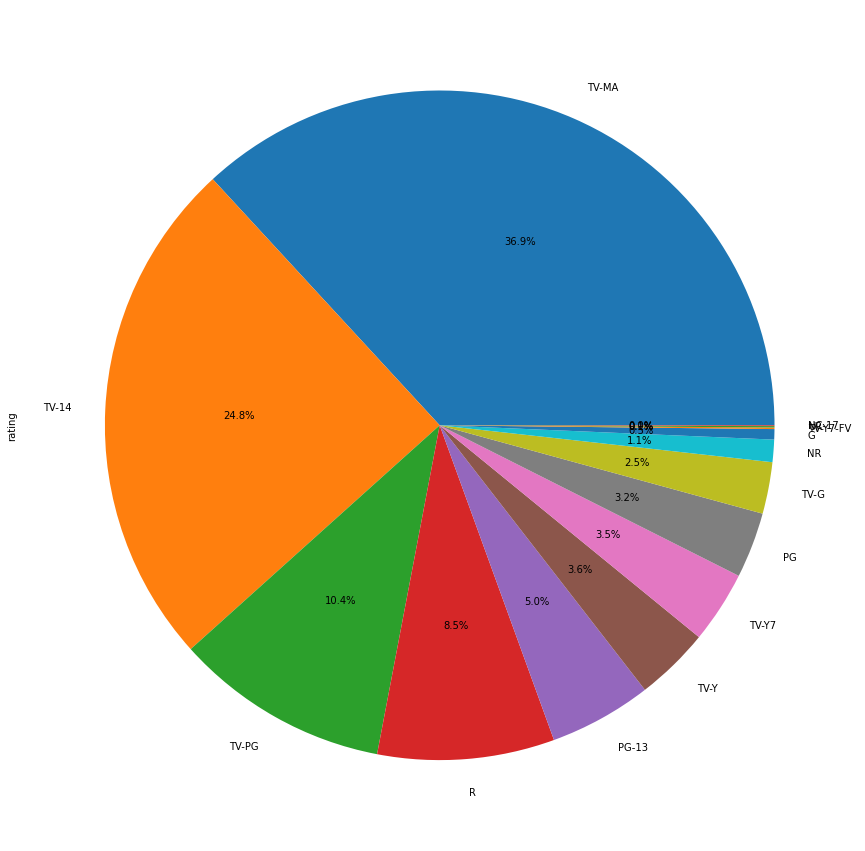

In [ ]:
#distributions according to the ratings
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,20))
plt.show()

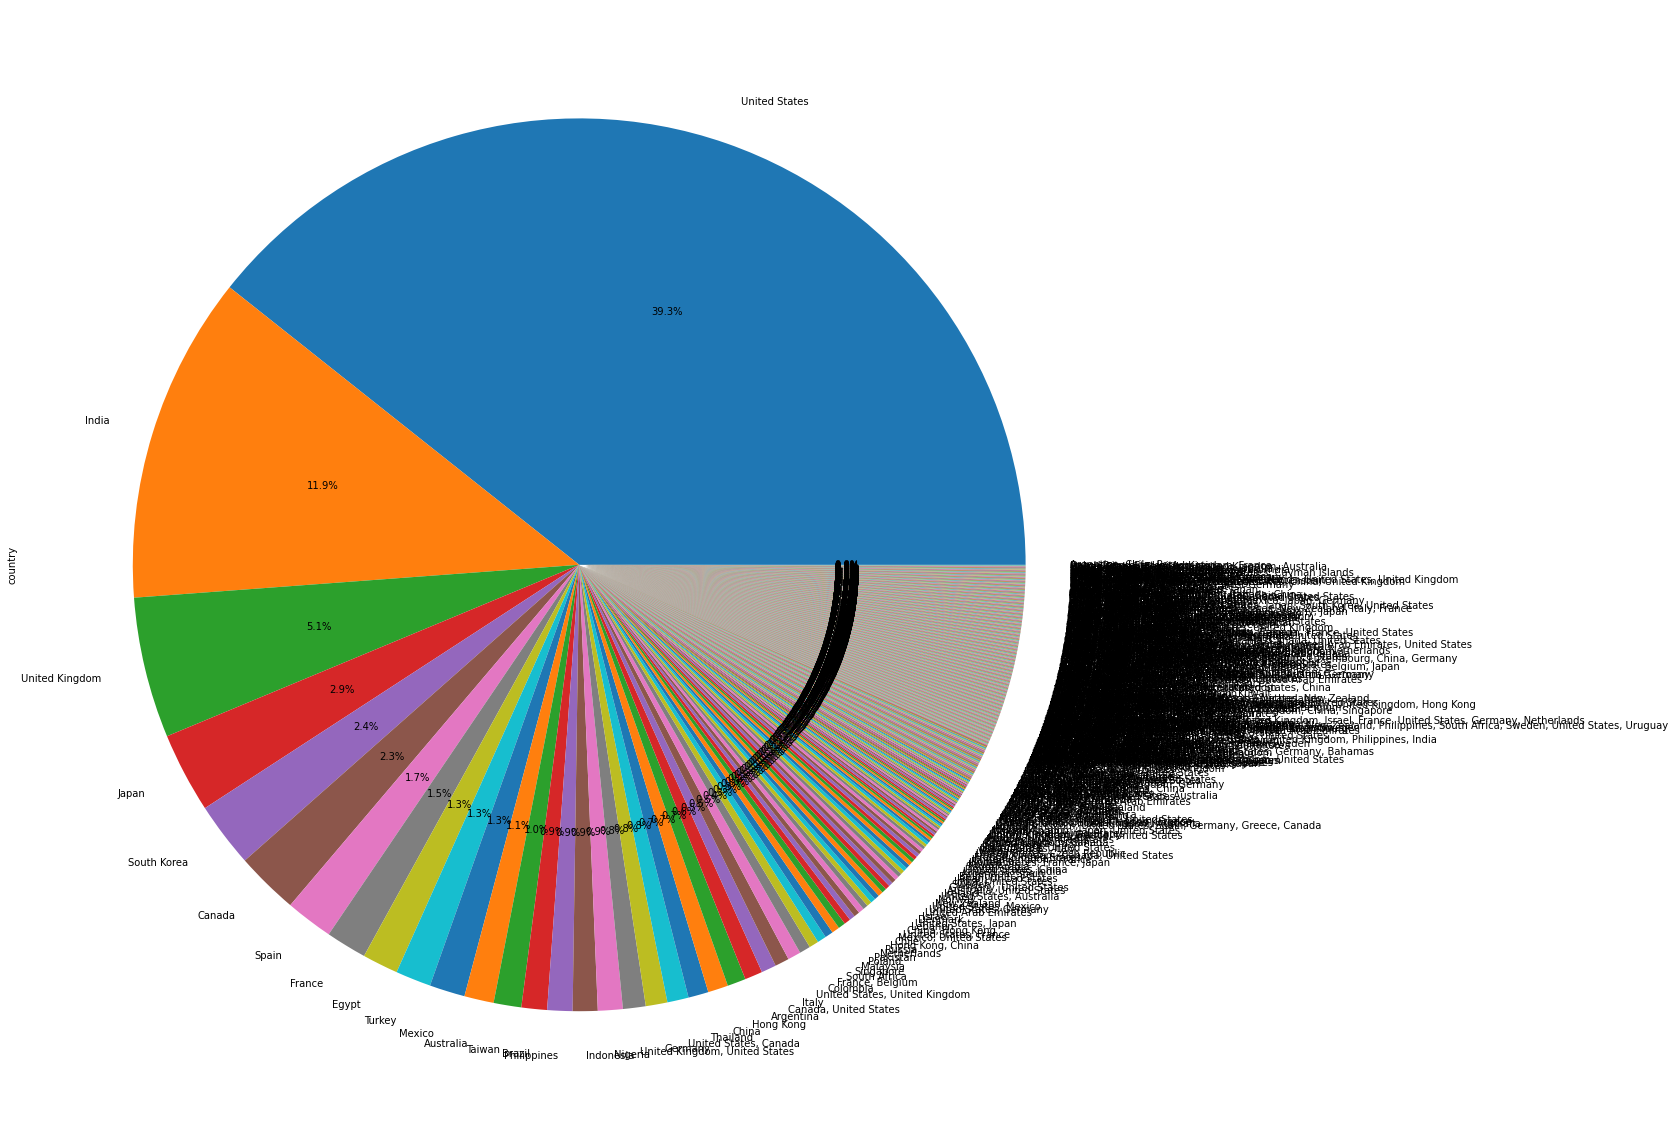

In [ ]:
#distribution according to the countries
df['country'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()

In [ ]:
#oldest movies available on netflix
old =df.sort_values("release_year",ascending=True)
old=old[old['duration']!= "" ]
old[['title','release_year']][:15]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7616,Why We Fight: The Battle of Russia,1943
7268,Tunisian Victory,1944
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
5371,San Pietro,1945


**standup shows on Netflix**

In [ ]:
#standup shows on Netflix
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
197,A Little Help with Carol Burnett,United States,2018
305,Adam Devine: Best Time of Our Lives,United States,2019
307,ADAM SANDLER 100% FRESH,United States,2018
310,Adel Karam: Live from Beirut,United States,2018
386,Ali Wong: Baby Cobra,United States,2016
387,Ali Wong: Hard Knock Wife,United States,2018
482,Amy Schumer Growing,United States,2019
483,Amy Schumer: The Leather Special,United States,2017
535,Anjelah Johnson: Not Fancy,United States,2015
550,Anthony Jeselnik: Fire in the Maternity Ward,United States,2019


In [ ]:
#Kids TV shows on Netflix
tag= "Kids' TV"
df["relevant"]=df['listed_in'].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
com=df[df["relevant"]==1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
108,3Below: Tales of Arcadia,United States,2019
225,A Series of Unfortunate Events,United States,2019
380,Alexa & Katie,United States,2020
396,Alien TV,United States,2020
411,All Hail King Julien,United States,2017
412,All Hail King Julien: Exiled,United States,2017
570,Archibald's Next Big Thing,United States,2020
598,Ask the StoryBots,United States,2019
632,Avatar: The Last Airbender,United States,2007
704,Bakugan: Armored Alliance,United States,2020


In [ ]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183


In [ ]:
#distribution of content on basis of countries
fig = px.choropleth(
locationmode='country names',
locations =df_countries["count"])
fig.show()

In [ ]:
date=pd.DataFrame(df.release_year.value_counts().reset_index().values,columns=["Year","Count"])
date.head()

,Year,Count
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

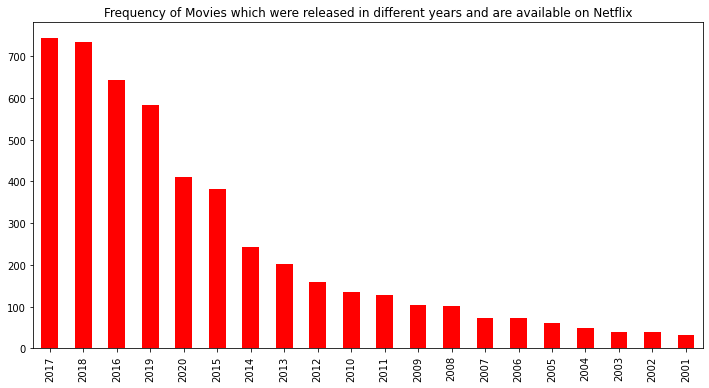

In [ ]:
#Frequency of Movies which were released in different years and are available on Netflix
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

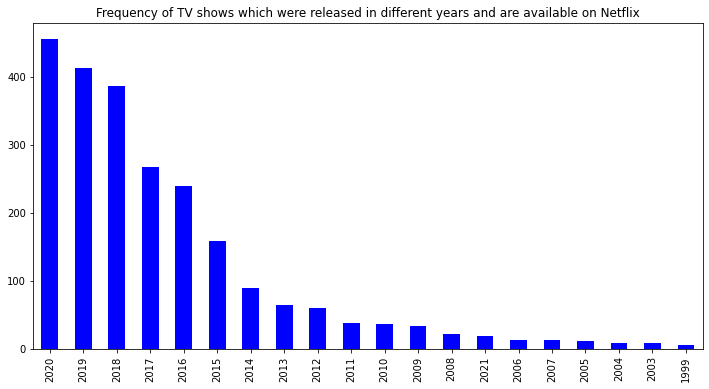

In [ ]:
#Frequency of TV shows which were released in different years and are available on Netflix
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

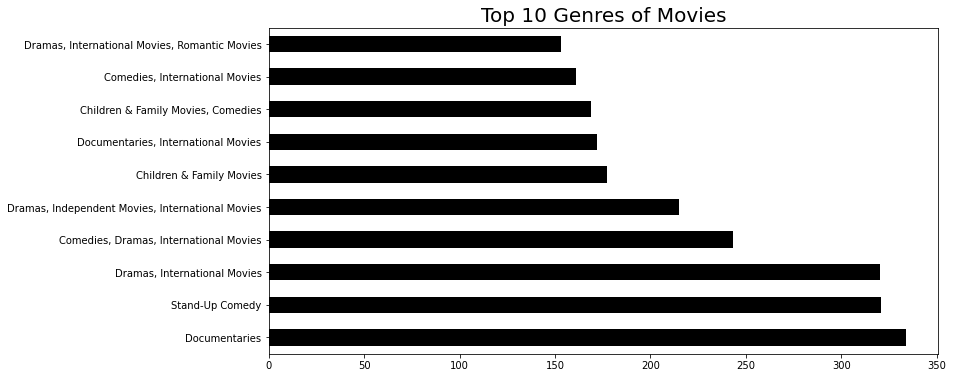

In [ ]:
#Top 10 Genres of Movies
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=20)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

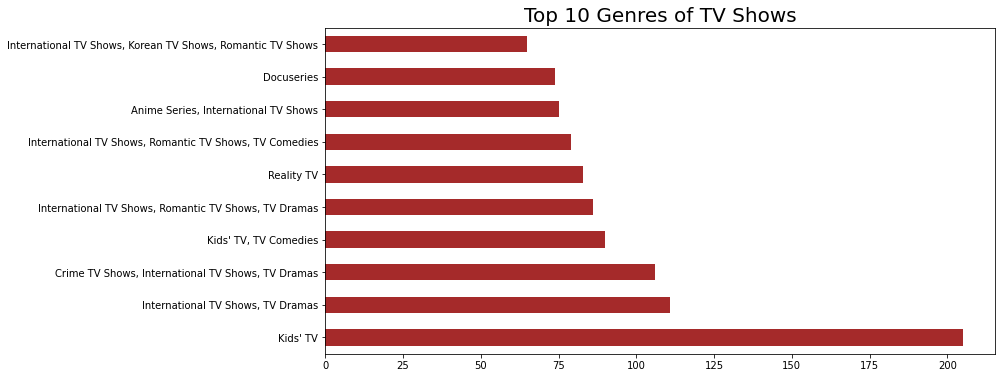

In [ ]:
# Top 10 Genres of TV Shows
plt.figure(figsize=(12,6))
df[df["type"]=="TV show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=20)

In [ ]:
from wordcloud import WordCloud

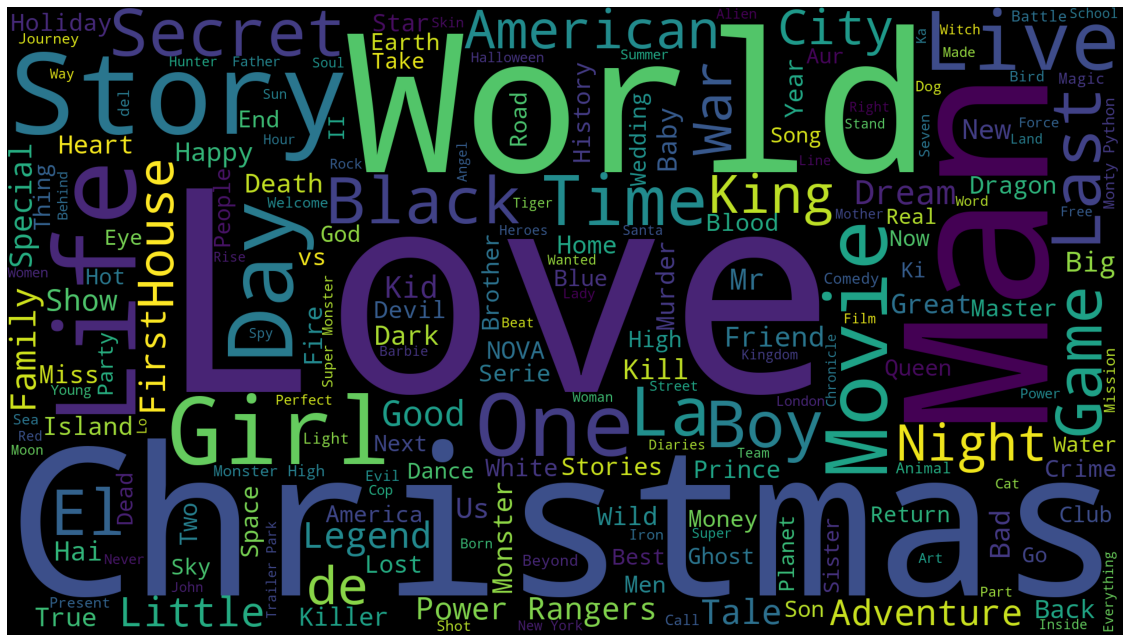

In [ ]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()